## Kaggle Digit Recognizer

`kaggle competitions download -c digit-recognizer`

In [1]:
import numpy as np
import pandas as pd

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

from utils import *

In [15]:
train = pd.read_csv('kg-data/train.csv', sep=',')
train.shape

(42000, 785)

In [16]:
train = shuffle(train)

X = train.iloc[:, 1:]
Y = train.iloc[:, 0]
Y_oh = pd.get_dummies(Y)

input_len = X.shape[1]

test_size = 0.1
X_train, X_test = train_test_split(X, test_size=test_size, shuffle=False)
Y_train, Y_test = train_test_split(Y, test_size=test_size, shuffle=False)
Y_train_oh, Y_test_oh = train_test_split(Y_oh, test_size=test_size, shuffle=False)

X_train = X_train.values
Y_train = Y_train.values
Y_train_oh = Y_train_oh.values

X_test = X_test.values
Y_test = Y_test.values
Y_test_oh = Y_test_oh.values

print('train/test: %d/%d' % (len(X_train), len(X_test)))

# reshape

X_train_len = len(X_train)
X_train = X_train.reshape((X_train_len, 28, 28, 1))

X_test_len = len(X_test)
X_test = X_test.reshape((X_test_len, 28, 28, 1))

train/test: 37800/4200


## Model

In [4]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, AveragePooling2D, Dropout
from keras.models import load_model

Using TensorFlow backend.


In [ ]:
def DigitRec_v1():
    pixel_values = Input(shape=(28, 28, 1, ), dtype='float32')
    X = Flatten()(pixel_values)
    X = Dense(20, activation='relu')(X)
    X = Dense(20, activation='relu')(X)
    X = Dense(10, activation='softmax')(X)
    model = Model(inputs=pixel_values, outputs=X)
    return model

In [5]:
def DigitRec_LeNet5():
    pixel_values = Input(shape=(28, 28, 1, ), dtype='float32')
    X = Conv2D(6, (5, 5), padding='same', activation='tanh')(pixel_values)
    X = AveragePooling2D(pool_size=(2, 2), strides=(2, 2))(X)
    X = Conv2D(16, (5, 5), activation='tanh')(X)
    X = AveragePooling2D(pool_size=(2, 2), strides=(2, 2))(X)
    X = Conv2D(120, (5, 5), activation='tanh')(X)
    X = Flatten()(X)
    X = Dense(84, activation='tanh')(X)
    X = Dropout(0.5)(X)
    X = Dense(10, activation='softmax')(X)
    model = Model(inputs=pixel_values, outputs=X)
    return model

In [ ]:
del model

In [6]:
model = DigitRec_LeNet5()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)    

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train_oh, epochs=20, batch_size=64, shuffle=True)

Epoch 1/20
37800/37800 [==============================] - 10s 269us/step - loss: 0.1958 - acc: 0.9420
Epoch 2/20
37800/37800 [==============================] - 10s 268us/step - loss: 0.1017 - acc: 0.9698
Epoch 3/20
37800/37800 [==============================] - 10s 274us/step - loss: 0.0809 - acc: 0.9763
Epoch 4/20
37800/37800 [==============================] - 12s 320us/step - loss: 0.0660 - acc: 0.9798
Epoch 5/20
37800/37800 [==============================] - 11s 285us/step - loss: 0.0595 - acc: 0.9813
Epoch 6/20
37800/37800 [==============================] - 10s 264us/step - loss: 0.0513 - acc: 0.9843
Epoch 7/20
37800/37800 [==============================] - 10s 264us/step - loss: 0.0480 - acc: 0.9853
Epoch 8/20
37800/37800 [==============================] - 10s 278us/step - loss: 0.0420 - acc: 0.9873
Epoch 9/20
37800/37800 [==============================] - 10s 271us/step - loss: 0.0397 - acc: 0.9878
Epoch 10/20
37800/37800 [==============================] - 11s 282us/step - loss: 

In [18]:
loss, acc = model.evaluate(X_test, Y_test_oh)
print("Test accuracy = ", acc)

4200/4200 [==============================] - 1s 142us/step
Test accuracy =  0.9864285714285714


## Predictions

In [19]:
Y_pred_oh = model.predict(X_test)
Y_pred = np.array([np.argmax(i) for i in Y_pred_oh])

In [20]:
err_num = 0
err_idx = []
for idx in range(len(X_test)):
    if Y_test[idx] != Y_pred[idx]:
        err_num += 1
        err_idx.append(idx)
print('total errors: ' + str(err_num))

total errors: 57


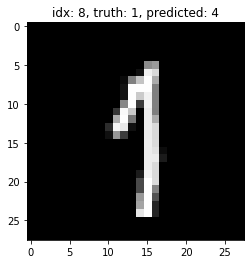

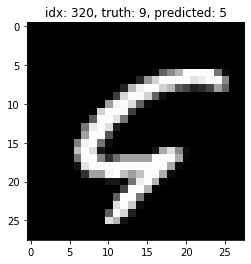

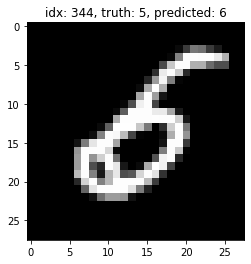

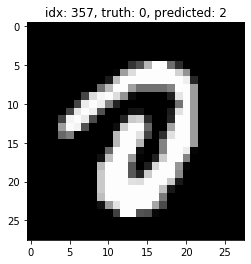

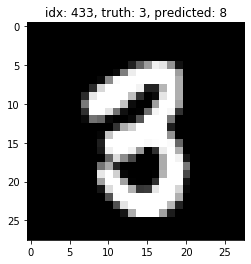

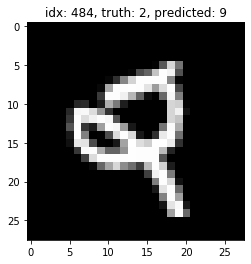

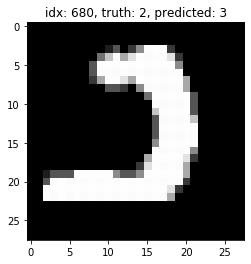

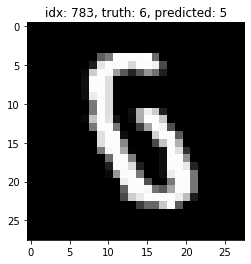

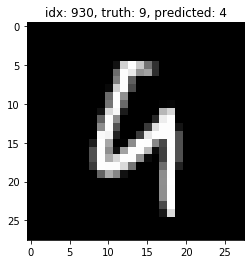

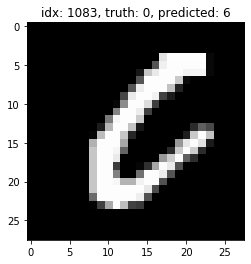

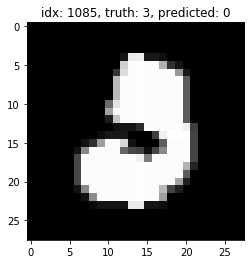

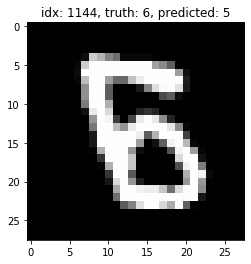

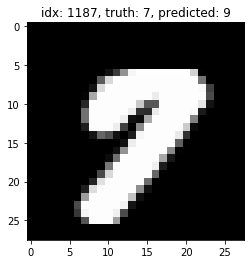

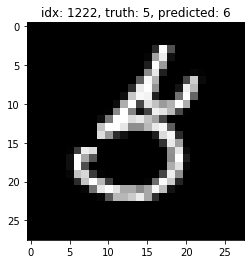

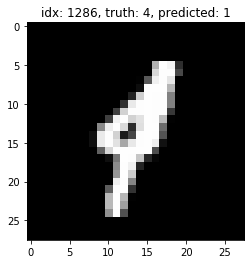

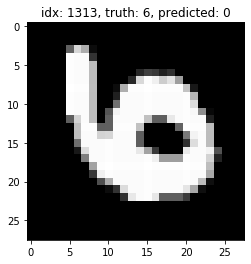

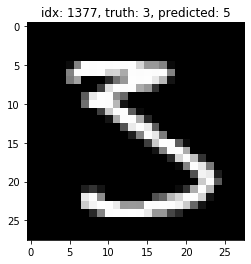

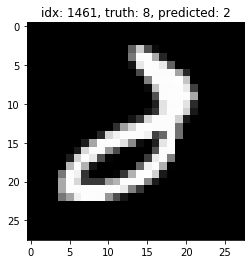

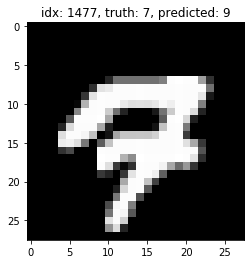

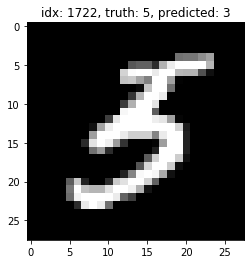

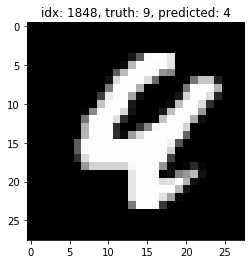

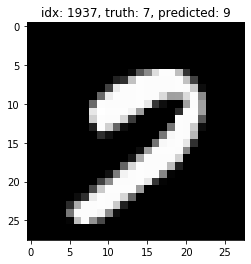

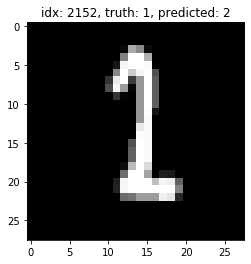

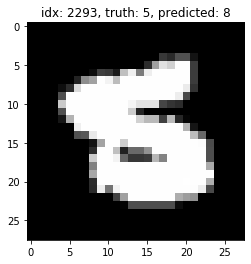

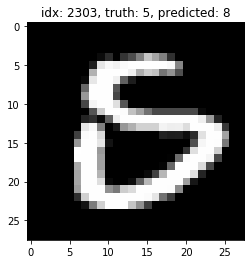

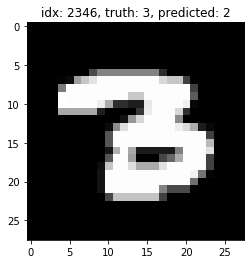

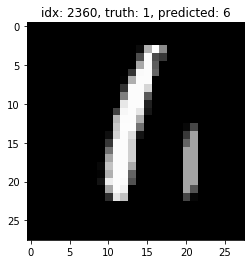

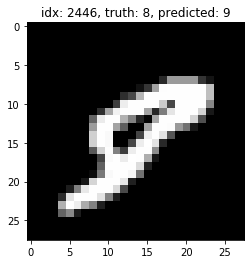

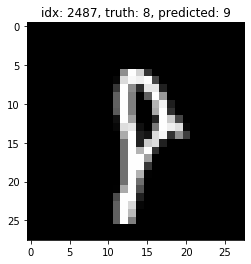

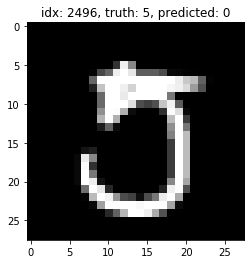

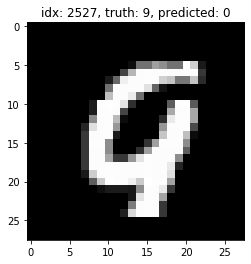

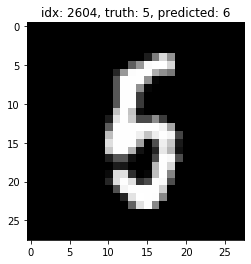

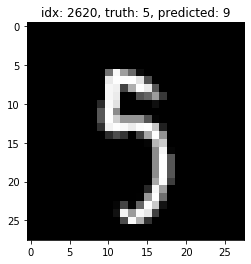

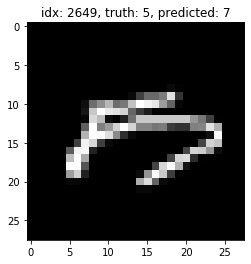

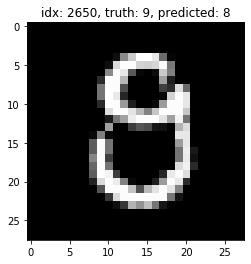

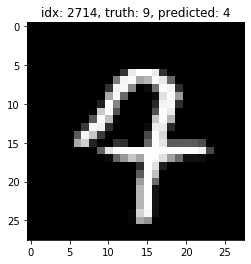

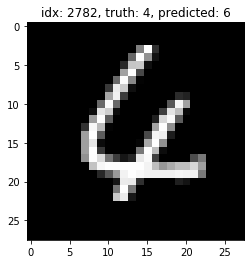

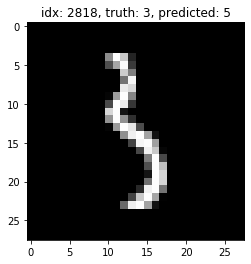

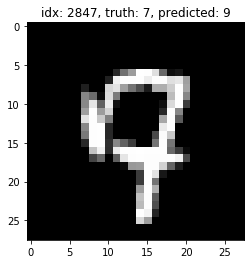

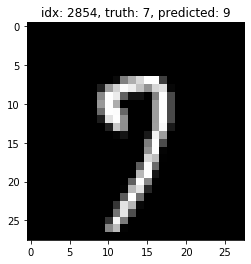

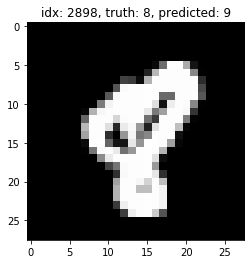

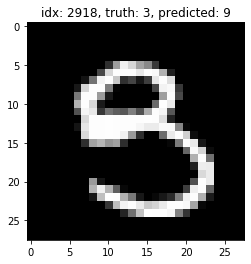

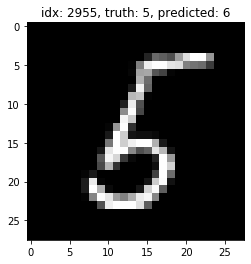

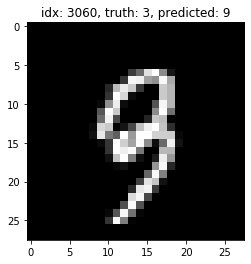

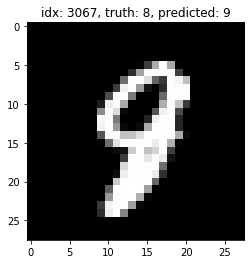

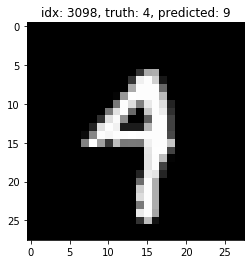

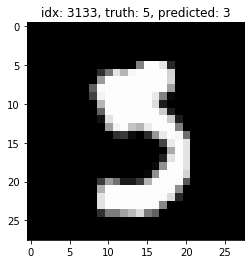

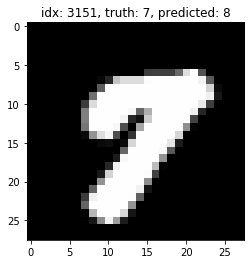

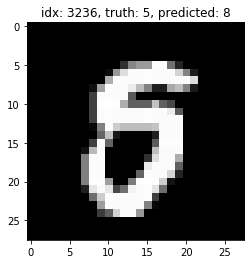

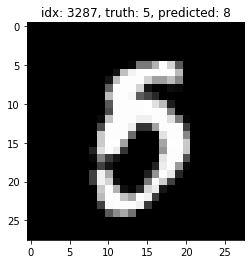

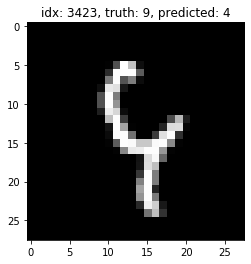

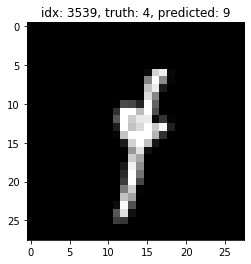

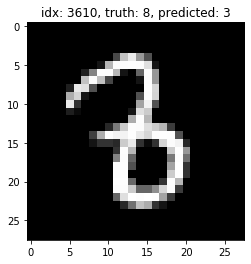

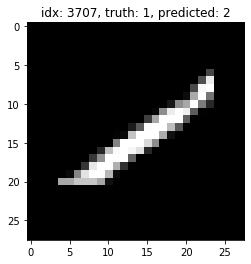

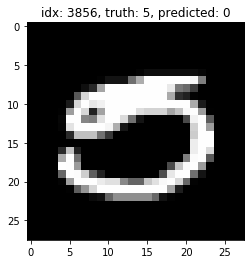

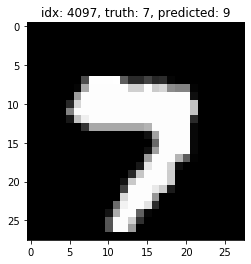

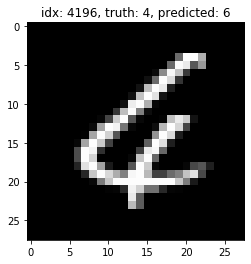

In [21]:
for idx in err_idx:
    pixels = X_test[idx].reshape((28, 28))
    plt.title('idx: ' + str(idx) + ', truth: ' + str(Y_test[idx]) + ', predicted: ' + str(Y_pred[idx]))
    plt.imshow(pixels, cmap=plt.cm.gray)
    plt.show()

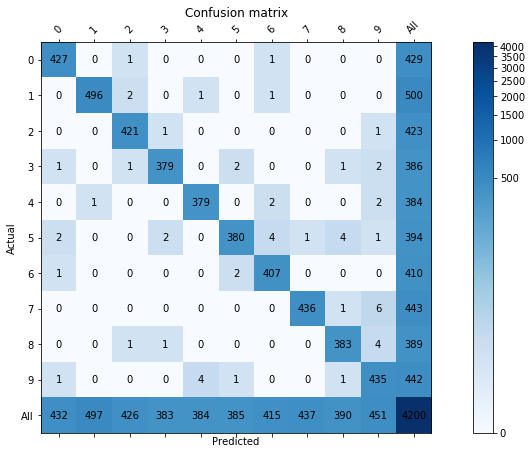

In [22]:
plot_confusion_matrix(Y_test, Y_pred, norm=False)

## Submission

In [23]:
sub_test = pd.read_csv('kg-data/test.csv', sep=',')
sub_test.shape

X_sub_test = sub_test.values
X_sub_test_len = len(X_sub_test)
X_sub_test = X_sub_test.reshape((X_sub_test_len, 28, 28, 1))

X_sub_test.shape

(28000, 28, 28, 1)

In [24]:
Y_sub_pred_oh = model.predict(X_sub_test)
Y_sub_pred = np.array([np.argmax(i) for i in Y_sub_pred_oh])

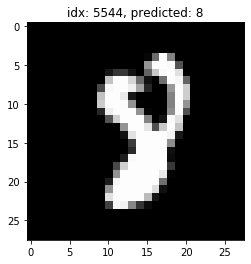

In [25]:
idx = np.random.randint(len(X_sub_test))
pixels = X_sub_test[idx].reshape((28, 28))
plt.title('idx: ' + str(idx) + ', predicted: ' + str(Y_sub_pred[idx]))
plt.imshow(pixels, cmap=plt.cm.gray)
plt.show()

In [ ]:
sub_pred_df = pd.DataFrame(columns=['ImageId', 'Label'])
for i in range(len(Y_sub_pred)):
    sub_pred_df.loc[i] = (i+1, Y_sub_pred[i])

In [ ]:
sub_pred_df[0:10]

In [ ]:
sub_pred_df.to_csv('kg-data/submission.csv', sep=',', index=False)